In [1]:
import pandas as pd
import csv
import sys
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import chardet
import matplotlib.pyplot as plt

In [2]:
data_unificados = pd.read_pickle('data_unificados.pkl')

In [3]:
data_unificados.shape

(9799985, 19)

In [4]:
data_unificados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799985 entries, 0 to 9799984
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   valor_de_venda     float64       
 1   valor_de_compra    float64       
 2   data_da_coleta     datetime64[ns]
 3   regiao___sigla     string        
 4   estado___sigla     string        
 5   municipio          string        
 6   revenda            string        
 7   cnpj_da_revenda    string        
 8   nome_da_rua        string        
 9   numero_rua         string        
 10  complemento        string        
 11  bairro             string        
 12  cep                string        
 13  produto            string        
 14  unidade_de_medida  string        
 15  bandeira           string        
 16  ano                float64       
 17  mes                float64       
 18  dia_da_semana      float64       
dtypes: datetime64[ns](1), float64(5), string(13)
memory usage: 1.4 

In [5]:
data_unificados.head()

,valor_de_venda,valor_de_compra,data_da_coleta,regiao___sigla,estado___sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,unidade_de_medida,bandeira,ano,mes,dia_da_semana
0,2.899,NaN,2014-01-02,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014.0,1.0,3.0
1,1.949,NaN,2014-01-02,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014.0,1.0,3.0
2,2.399,NaN,2014-01-02,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014.0,1.0,3.0
3,2.569,NaN,2014-01-02,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014.0,1.0,3.0
4,1.599,NaN,2014-01-02,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.,2014.0,1.0,3.0


In [6]:
data_unificados.isna().sum()

valor_de_venda             1
valor_de_compra      7179843
data_da_coleta             1
regiao___sigla             0
estado___sigla             0
municipio                  0
revenda                    0
cnpj_da_revenda            0
nome_da_rua                0
numero_rua              5073
complemento          7368913
bairro                 29905
cep                        0
produto                    0
unidade_de_medida          1
bandeira                   1
ano                        1
mes                        1
dia_da_semana              1
dtype: int64

In [7]:
percent_data = data_unificados.isna().mean() * 100
print(percent_data)

valor_de_venda        0.000010
valor_de_compra      73.263816
data_da_coleta        0.000010
regiao___sigla        0.000000
estado___sigla        0.000000
municipio             0.000000
revenda               0.000000
cnpj_da_revenda       0.000000
nome_da_rua           0.000000
numero_rua            0.051765
complemento          75.193105
bairro                0.305154
cep                   0.000000
produto               0.000000
unidade_de_medida     0.000010
bandeira              0.000010
ano                   0.000010
mes                   0.000010
dia_da_semana         0.000010
dtype: float64


In [8]:
data_unificados.describe()

,valor_de_venda,valor_de_compra,ano,mes,dia_da_semana
count,9.799984e+06,2.620142e+06,9.799984e+06,9.799984e+06,9.799984e+06
mean,3.966925e+00,2.812643e+00,2.018626e+03,6.118203e+00,1.267309e+00
std,1.341982e+00,6.172286e-01,3.293880e+00,3.412407e+00,1.076894e+00
min,1.339000e+00,1.030700e+00,2.014000e+03,1.000000e+00,0.000000e+00
25%,2.989000e+00,2.407000e+00,2.016000e+03,3.000000e+00,0.000000e+00
50%,3.597000e+00,2.747000e+00,2.018000e+03,6.000000e+00,1.000000e+00
75%,4.790000e+00,3.200000e+00,2.022000e+03,9.000000e+00,2.000000e+00
max,9.790000e+00,5.091000e+00,2.024000e+03,1.200000e+01,6.000000e+00


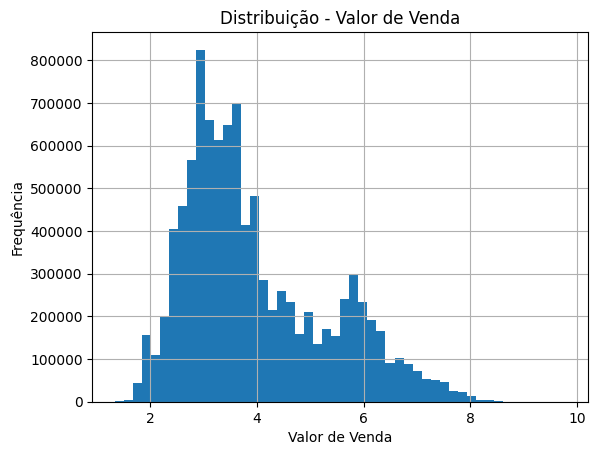

In [9]:
data_unificados['valor_de_venda'].hist(bins=50)
plt.xlabel('Valor de Venda')
plt.ylabel('Frequência')
plt.title('Distribuição - Valor de Venda')
plt.show()

In [10]:
# Criar features a partir da data
# Ano: captura a tendência de longo prazo
data_unificados['ano'] = data_unificados['data_da_coleta'].dt.year

# Mês: captura sazonalidade e variações mensais
data_unificados['mes'] = data_unificados['data_da_coleta'].dt.month

# Dia da semana: útil para identificar padrões de comportamento entre dias úteis e finais de semana
data_unificados['dia_da_semana'] = data_unificados['data_da_coleta'].dt.dayofweek  # 0 = Segunda, 6 = Domingo

data_unificados.to_pickle('data_unificados.pkl')

print("Features de data criadas e arquivo 'data_unificados.pkl' atualizado.")

Features de data criadas e arquivo 'data_unificados.pkl' atualizado.


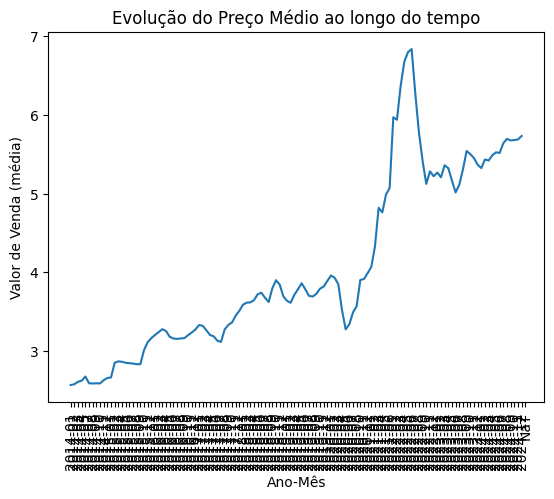

In [11]:
# Criar uma coluna "ano_mes" pra facilitar
data_unificados['ano_mes'] = data_unificados['data_da_coleta'].dt.to_period('M').astype(str)

# Agrupa por ano-mês e calcula a média
df_mensal = data_unificados.groupby('ano_mes')['valor_de_venda'].mean().reset_index()

# Plotar
plt.plot(df_mensal['ano_mes'], df_mensal['valor_de_venda'])
plt.xticks(rotation=90)  # gira labels no eixo X se necessário
plt.xlabel('Ano-Mês')
plt.ylabel('Valor de Venda (média)')
plt.title('Evolução do Preço Médio ao longo do tempo')
plt.show()


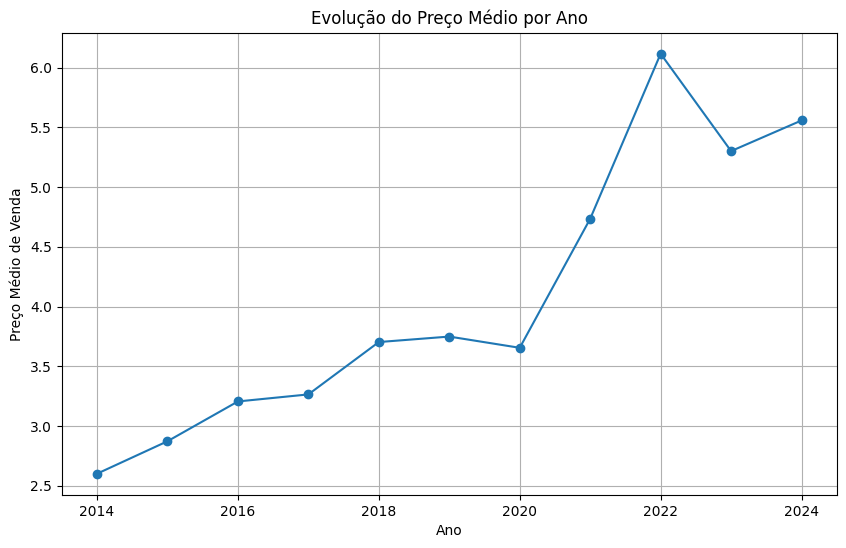

In [12]:
df_ano = data_unificados.groupby('ano')['valor_de_venda'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_ano['ano'], df_ano['valor_de_venda'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Preço Médio de Venda')
plt.title('Evolução do Preço Médio por Ano')
plt.grid(True)
plt.show()


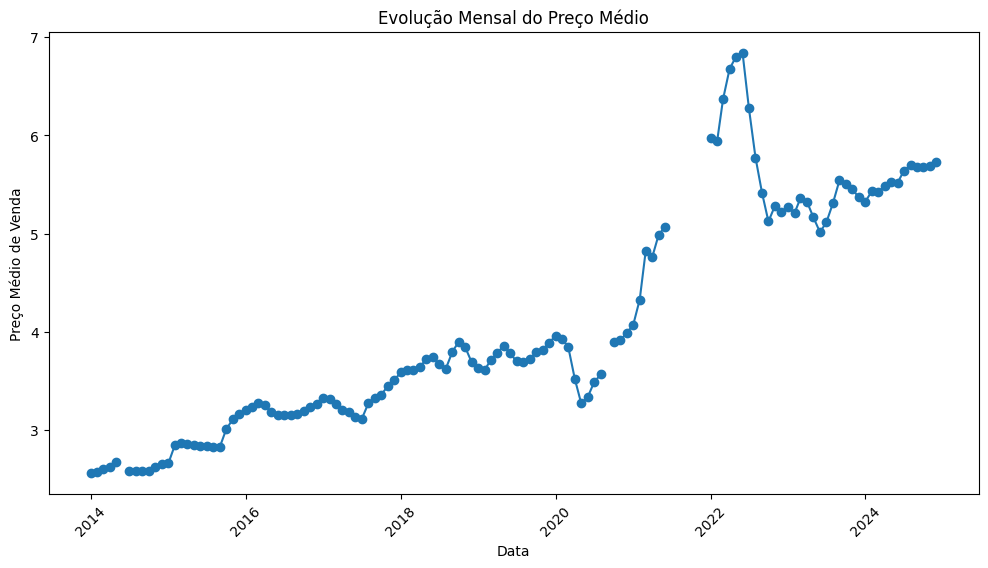

In [13]:
# Supondo que df['data_da_coleta'] seja datetime
df_mensal = data_unificados.groupby(pd.Grouper(key='data_da_coleta', freq='MS'))['valor_de_venda'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_da_coleta'], df_mensal['valor_de_venda'], marker='o')
plt.xlabel('Data')
plt.ylabel('Preço Médio de Venda')
plt.title('Evolução Mensal do Preço Médio')
plt.xticks(rotation=45)
plt.show()


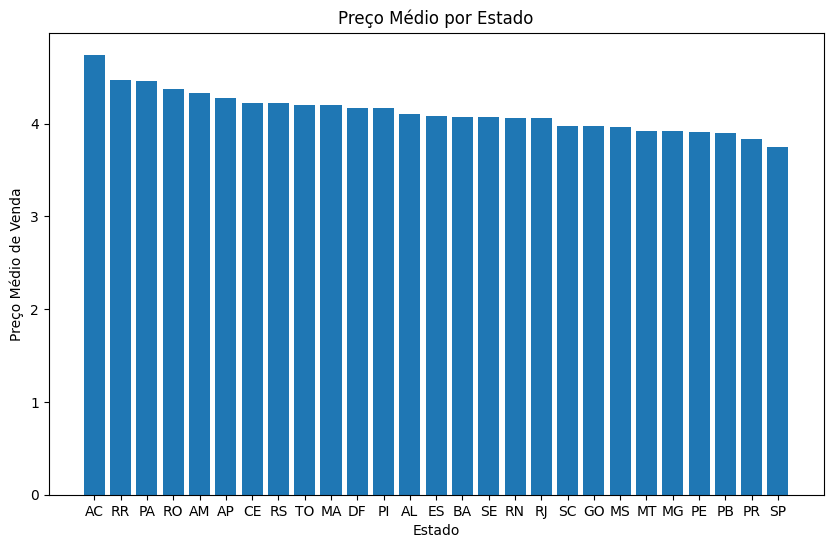

In [14]:
df_estado = data_unificados.groupby('estado___sigla')['valor_de_venda'].mean().reset_index()
df_estado.sort_values('valor_de_venda', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.bar(df_estado['estado___sigla'], df_estado['valor_de_venda'])
plt.xlabel('Estado')
plt.ylabel('Preço Médio de Venda')
plt.title('Preço Médio por Estado')
plt.show()


C:\Users\Henrique\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Henrique\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


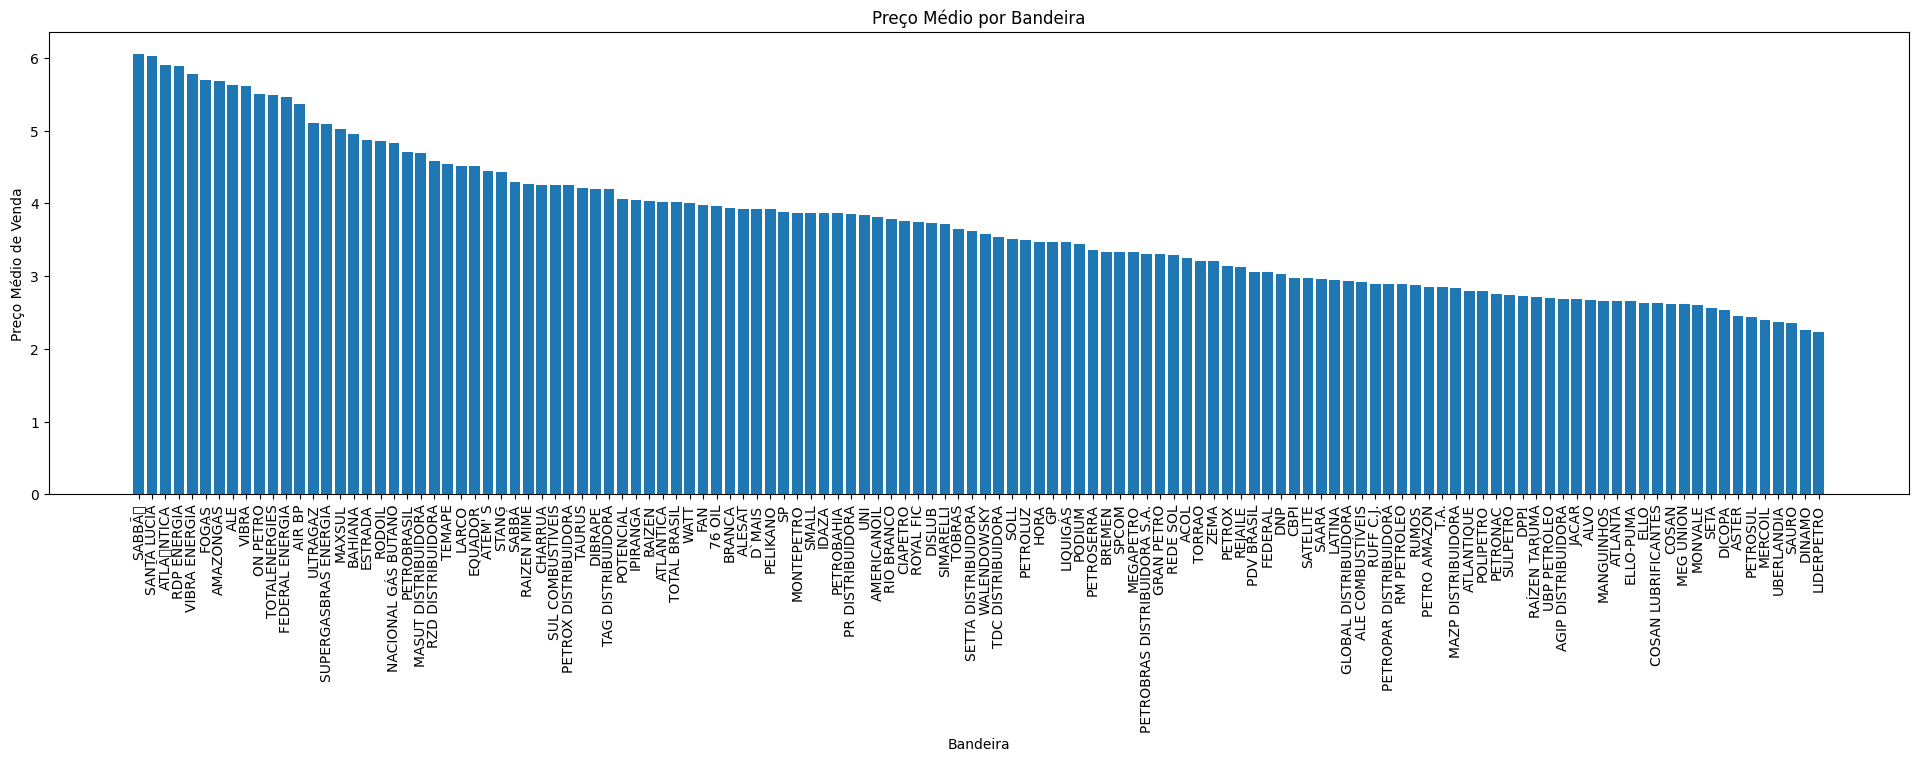

In [15]:
df_bandeira = data_unificados.groupby('bandeira')['valor_de_venda'].mean().reset_index()
df_bandeira.sort_values('valor_de_venda', ascending=False, inplace=True)

plt.figure(figsize=(24,6))
plt.bar(df_bandeira['bandeira'], df_bandeira['valor_de_venda'])
plt.xticks(rotation=90)
plt.xlabel('Bandeira')
plt.ylabel('Preço Médio de Venda')
plt.title('Preço Médio por Bandeira')
plt.show()


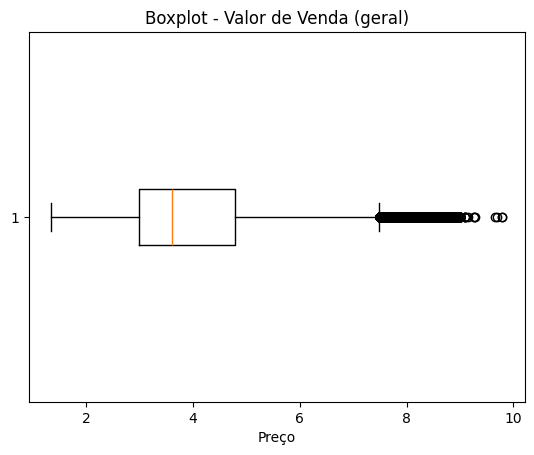

In [16]:
plt.boxplot(data_unificados['valor_de_venda'].dropna(), vert=False)
plt.title('Boxplot - Valor de Venda (geral)')
plt.xlabel('Preço')
plt.show()


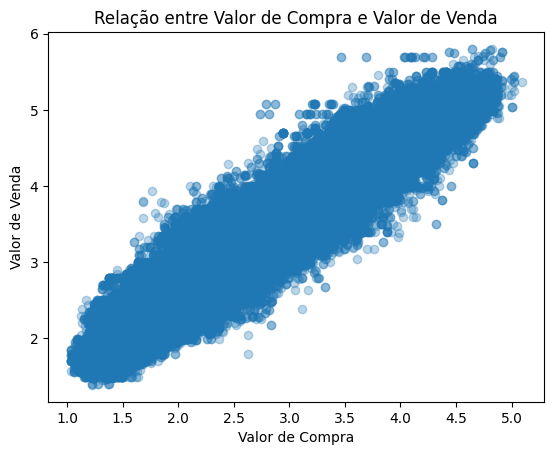

                 valor_de_venda  valor_de_compra
valor_de_venda         1.000000         0.971007
valor_de_compra        0.971007         1.000000


In [17]:
# Scatter plot
plt.scatter(
    data_unificados['valor_de_compra'],
    data_unificados['valor_de_venda'],
    alpha=0.3
)
plt.xlabel('Valor de Compra')
plt.ylabel('Valor de Venda')
plt.title('Relação entre Valor de Compra e Valor de Venda')
plt.show()

# Coeficiente de correlação
corr = data_unificados[['valor_de_venda','valor_de_compra']].corr()
print(corr)

In [18]:
data_unificados['mes'] = data_unificados['data_da_coleta'].dt.month
data_unificados['ano'] = data_unificados['data_da_coleta'].dt.year

df_sazonal = data_unificados.groupby(['ano','mes'])['valor_de_venda'].mean().reset_index()

df_sazonal_pivot = df_sazonal.pivot(index='ano', columns='mes', values='valor_de_venda')
print(df_sazonal_pivot)


mes         1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
ano                                                                            
2014.0  2.563524  2.573749  2.606133  2.618723  2.671760       NaN  2.586051   
2015.0  2.660007  2.846982  2.865151  2.859195  2.847219  2.841134  2.836873   
2016.0  3.200444  3.237285  3.274507  3.250504  3.178351  3.155883  3.150659   
2017.0  3.326996  3.317724  3.261212  3.200652  3.183183  3.128683  3.111601   
2018.0  3.585457  3.611723  3.615049  3.643665  3.718141  3.738266  3.674484   
2019.0  3.635586  3.610731  3.711328  3.782470  3.858353  3.781819  3.698400   
2020.0  3.957515  3.928617  3.845332  3.519450  3.272280  3.336090  3.486971   
2021.0  4.067276  4.327295  4.818283  4.759774  4.984876  5.071026       NaN   
2022.0  5.970239  5.938988  6.367336  6.677306  6.798474  6.838352  6.274164   
2023.0  5.266350  5.207353  5.360056  5.322437  5.164569  5.013754  5.112356   
2024.0  5.324038  5.433016  5.419682  5.

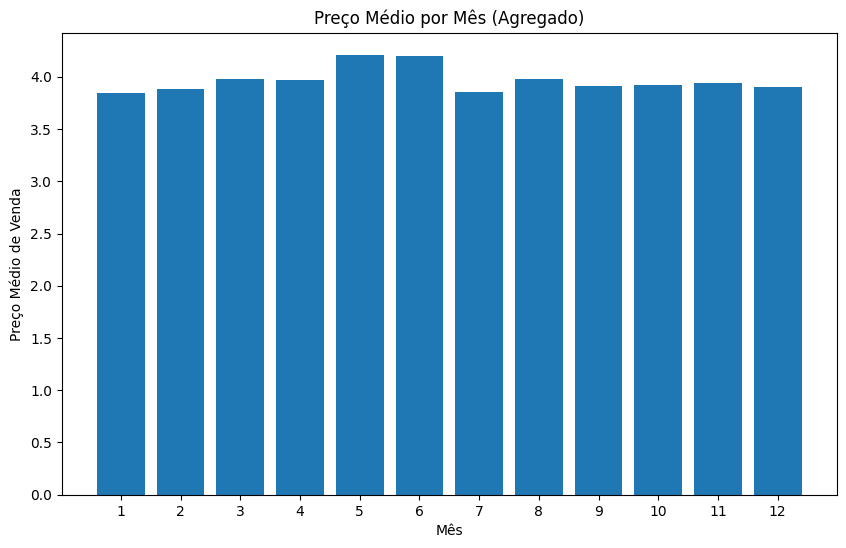

In [19]:
df_mes = data_unificados.groupby('mes')['valor_de_venda'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_mes['mes'], df_mes['valor_de_venda'])
plt.xlabel('Mês')
plt.ylabel('Preço Médio de Venda')
plt.title('Preço Médio por Mês (Agregado)')
plt.xticks(df_mes['mes'])
plt.show()


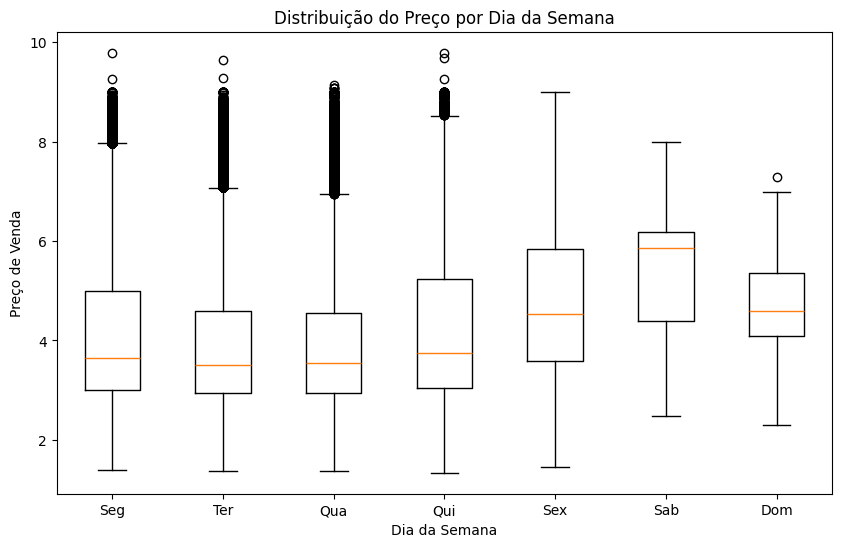

In [20]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_unificados[data_unificados['dia_da_semana']==i]['valor_de_venda'] for i in range(7)], labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.xlabel('Dia da Semana')
plt.ylabel('Preço de Venda')
plt.title('Distribuição do Preço por Dia da Semana')
plt.show()


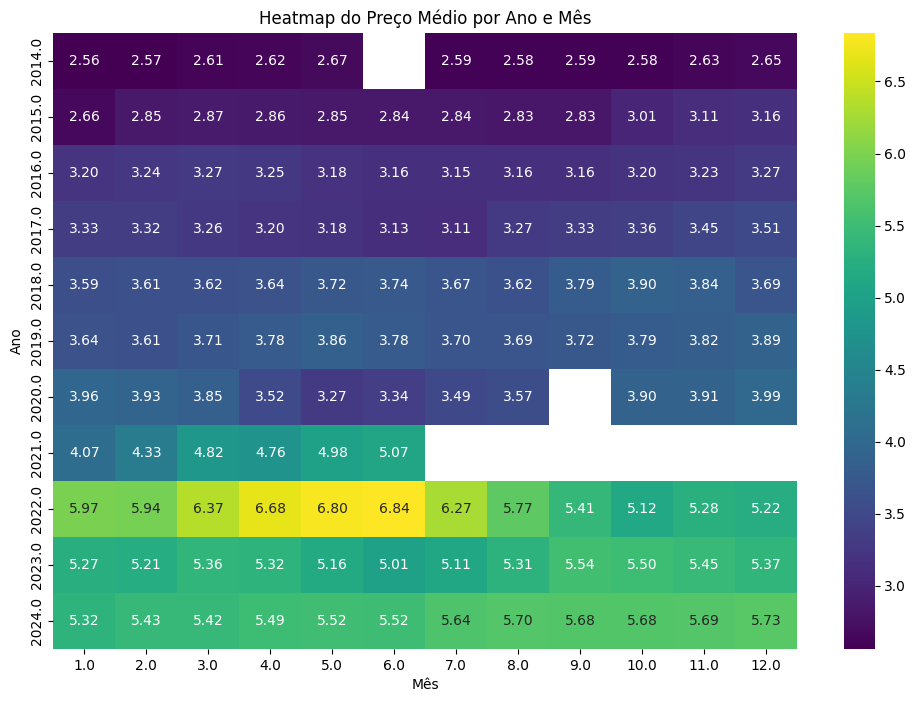

In [21]:


# Agregar média de preço para cada combinação de ano e mês
df_heat = data_unificados.groupby(['ano', 'mes'])['valor_de_venda'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(df_heat, annot=True, fmt=".2f", cmap='viridis')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.title('Heatmap do Preço Médio por Ano e Mês')
plt.show()
